In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_excel("car data.csv.xlsx")
df.head()



,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
df.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [11]:
df.dropna(inplace=True)


In [12]:
df['Car_Age'] = 2025 - df['Year']
df.drop('Year', axis=1, inplace=True)


In [13]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,4.75,9.54,43000,0,12,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,7.25,9.85,6900,0,8,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2.85,4.15,5200,0,14,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,4.60,6.87,42450,0,11,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


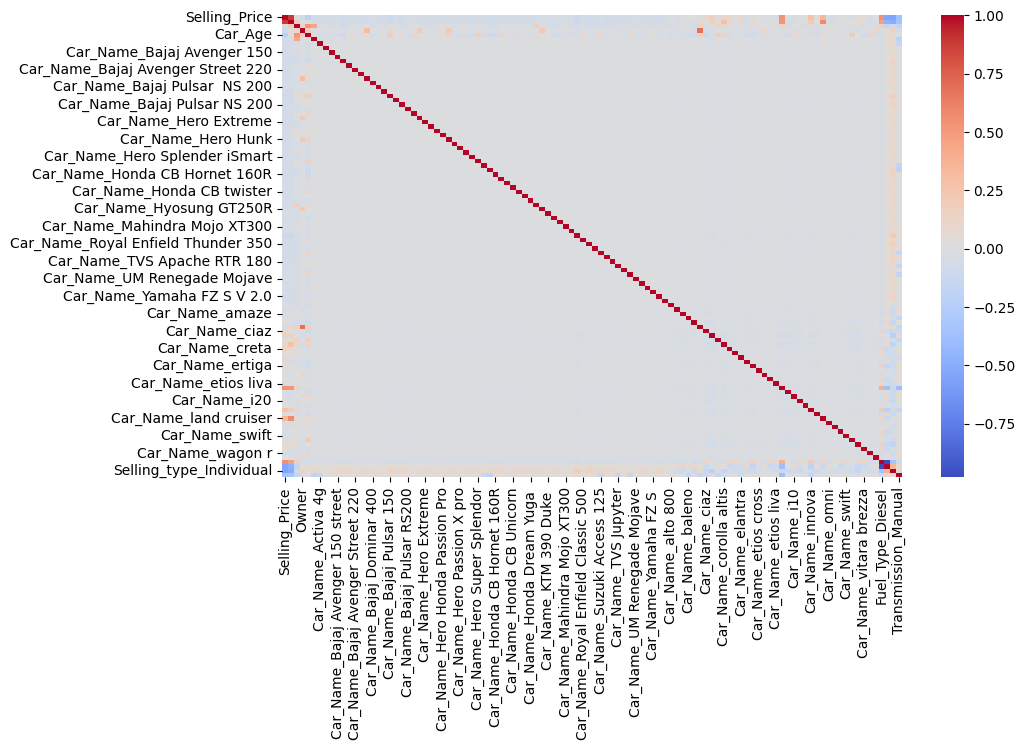

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()


In [15]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [18]:
y_pred = model.predict(X_test)
y_pred


array([ 7.47327051,  9.58880632,  5.56883578, -0.40941815,  8.55896043,
        6.88890857,  1.47635719,  6.23695329,  0.98014478,  6.68925428,
       15.63172868,  0.29557627,  7.97759508,  8.08373759,  6.19289061,
        2.70151483,  2.72386344, 10.98923224,  7.77090451,  8.56271721,
        5.55477855,  7.63455899,  5.6498586 ,  1.89746929,  6.25342368,
        3.48912822,  5.48662283,  1.6085983 ,  2.6805568 ,  2.67421952,
       -0.03307212,  9.11656913, -2.33116821,  1.98326133,  8.36119393,
        3.98900218,  6.09888859,  6.17398282,  4.27677317,  6.74710603,
        5.51688689,  8.34755944,  3.67455712,  0.25706045, 13.06489129,
        0.04497286,  8.34319661,  9.55198302,  3.90152259,  4.03845455,
        5.9287072 ,  2.70075543, 22.92984367, 20.60225579,  7.30522747,
        9.84045173,  4.59171221,  8.91665681,  0.05897455,  6.62617599,
        3.66819743])

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 2.036517479152065
MSE: 9.221090393533995
R2 Score: 0.5997023481035675


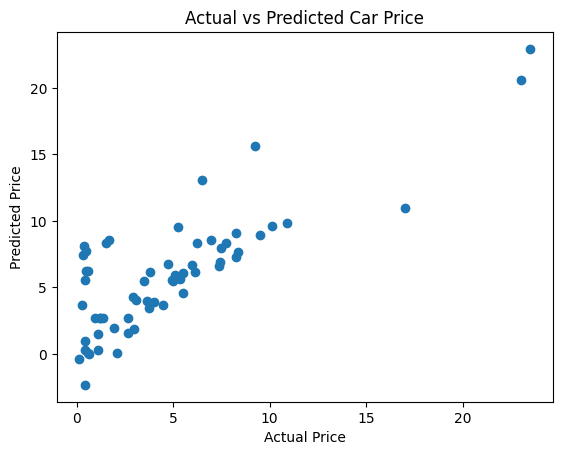

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Price")
plt.show()
